In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#For modeling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [2]:
df = pd.read_csv("50_Startups.csv")
df.head(15)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
df.shape

(50, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [6]:
sum(df.duplicated())

0

In [7]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


We check correlation between;
*independent variables and dependent variables
*independent variables and independent variables 

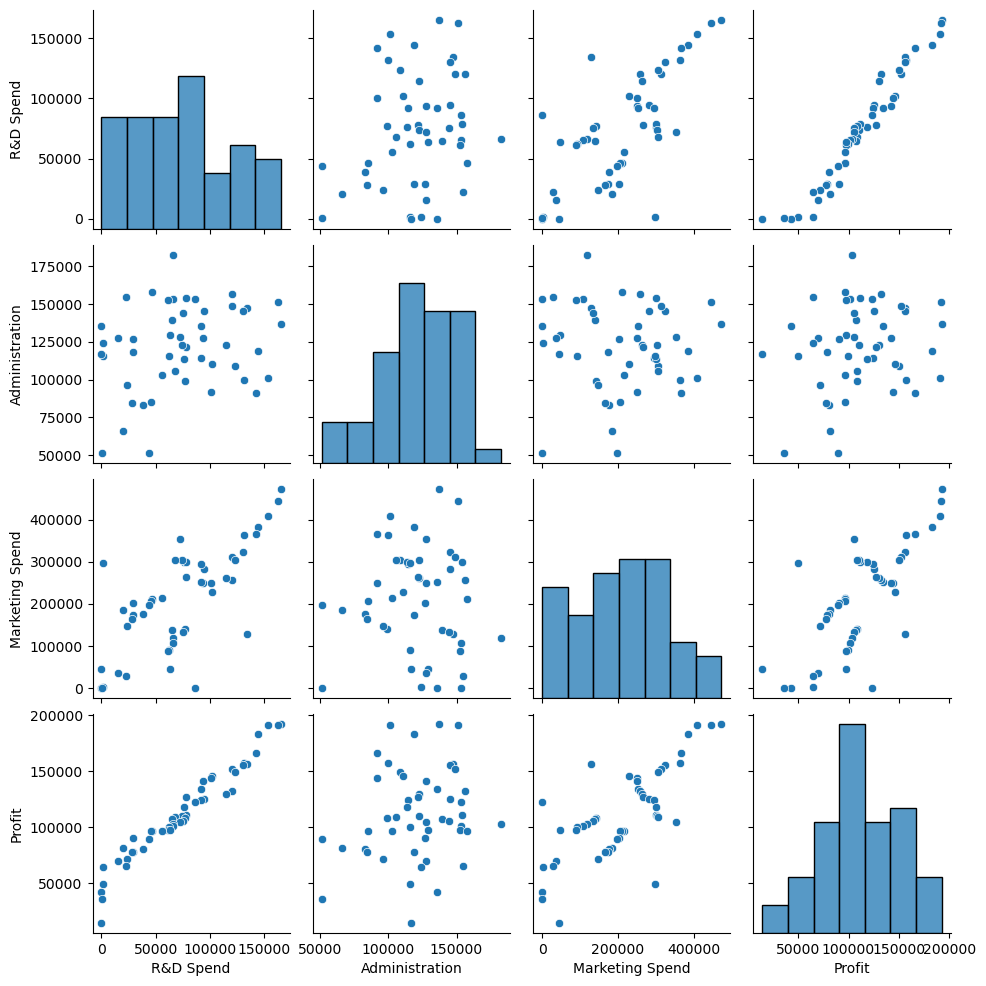

In [9]:
#A pairplot plot a pairwise relationships in a dataset 
sns.pairplot(df)

<Axes: >

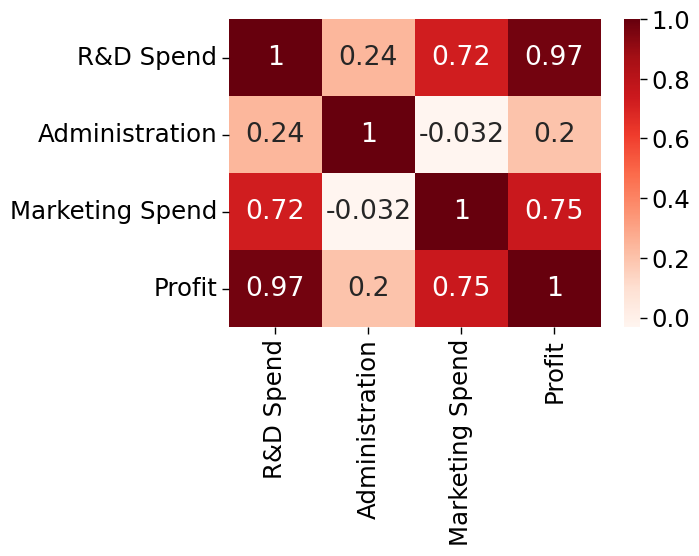

In [10]:
plt.figure(figsize=(6,4))
sns.set_context('paper',font_scale = 2)
corr_matrix=df.corr()
#annot will show the numbers inside each coloured box
sns.heatmap(corr_matrix,annot=True,cmap='Reds')

In [11]:
corr_matrix

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<Axes: xlabel='Profit', ylabel='Density'>

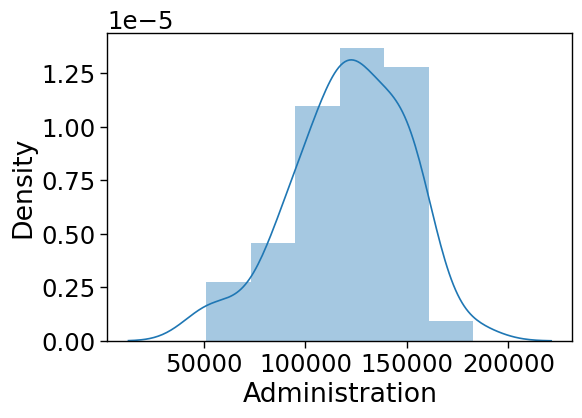

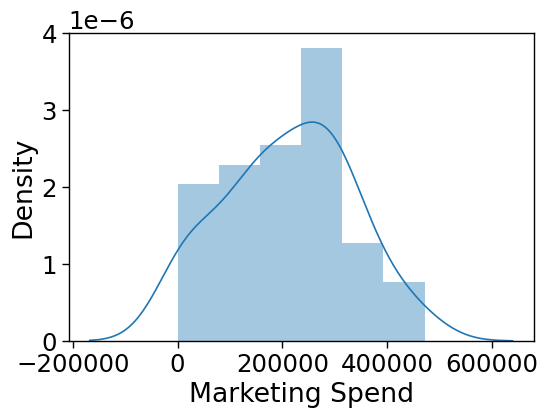

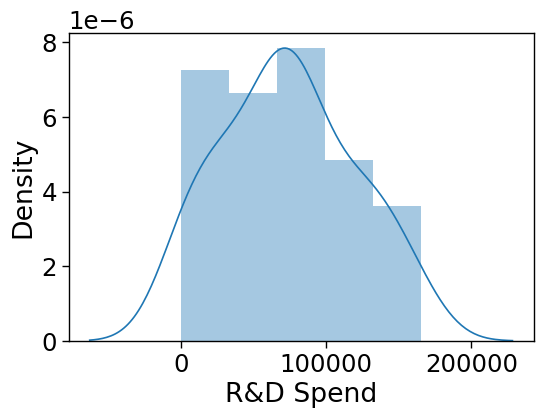

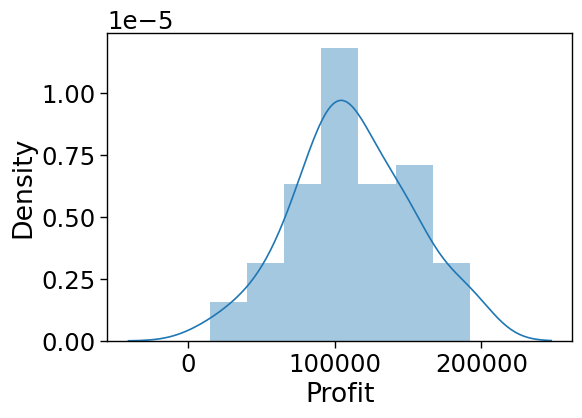

In [12]:
plt.figure(figsize=(6,4))
sns.distplot(df['Administration']),
plt.figure(figsize=(6,4))
sns.distplot(df['Marketing Spend']),
plt.figure(figsize=(6,4))
sns.distplot(df['R&D Spend']),
plt.figure(figsize=(6,4))
sns.distplot(df['Profit'])

Now since it is a normal distribution we don't need Scaling

<Axes: xlabel='State', ylabel='count'>

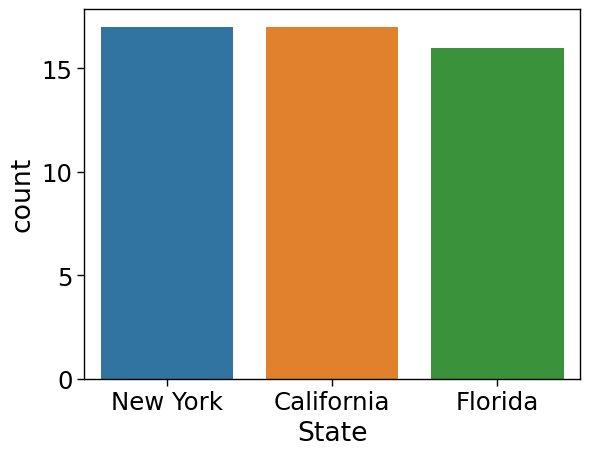

In [13]:
sns.countplot(x='State',data=df)

Vif test to check multicollinearity since we saw correlation between independet variables 

In [14]:
X = df[['R&D Spend', 'Administration' ,'Marketing Spend']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns 
vif_data

,feature
0,R&D Spend
1,Administration
2,Marketing Spend


In [15]:
vif_data["VIF"] = [variance_inflation_factor(X.values,i)
                  for i in range(len(X.columns))]
print(vif_data)

           feature       VIF
0        R&D Spend  8.384571
1   Administration  4.026406
2  Marketing Spend  7.593984


We can see R&D spend and Marketing spend has highest vif values we can infer Marketing spend and R&D spend are correlated to each other

We are creating mini model for different combinations of dependent and independent variables using stats model, api, ols function we will do the r^2 and p value analysis for each mini value 

In [16]:
def model_summary(x,y):
    xtr = sm.add_constant(np.array(df[x]))
    model = sm.OLS(np.array(df[y]), xtr).fit()
    print(model.summary())

In [17]:
model_summary('R&D Spend','Profit')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           3.50e-32
Time:                        14:05:05   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.0

In [18]:
def model_summary(x,y):
    xtr = sm.add_constant(np.array(df[x]))
    model = sm.OLS(np.array(df[y]), xtr).fit()
    print(model.summary())

In [19]:
model_summary('Marketing Spend','Profit')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           4.38e-10
Time:                        14:05:05   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const           6e+04   7684.530      7.808      0.0

In [20]:
model_summary('Administration','Profit')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sun, 17 Sep 2023   Prob (F-statistic):              0.162
Time:                        14:05:06   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.697e+04   2.53e+04      3.040      0.0

p value is large for Administration and Profit so we are adropping Adminitration

In [21]:
model_summary(['R&D Spend','Marketing Spend'],'Profit')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           2.16e-31
Time:                        14:05:07   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.0

We will be dropping Marketing Spend because it has correlation with R&D Spend and it has low r^2 value and high p value

In [22]:
df.drop(columns=['Administration', 'Marketing Spend'], inplace=True)

In [23]:
df.head()

,R&D Spend,State,Profit
0,165349.20,New York,192261.83
1,162597.70,California,191792.06
2,153441.51,Florida,191050.39
3,144372.41,New York,182901.99
4,142107.34,Florida,166187.94


In [24]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [27]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

LinearRegression()

In [33]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[104968.88 103282.38]
 [133957.34 144259.4 ]
 [135497.03 146121.95]
 [ 72485.31  77798.83]
 [179362.05 191050.39]
 [109820.28 105008.31]
 [ 65657.67  81229.06]
 [100480.72  97483.56]
 [111730.62 110352.25]
 [169713.52 166187.94]]


In [34]:
print("MAE", metrics.mean_absolute_error(y_test,y_pred))
print("MSE", mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

MAE 6789.980111923081
MSE 67565210.75863892
RMSE 8219.8060049273


In [35]:
r2_score(y_test,y_pred)

0.9471689304016904